In [1]:
import sys
import csv
import pandas as pd
from matplotlib import pyplot as plt
from pandas import DataFrame, read_excel
from pandas import pivot_table, crosstab, melt, merge
import seaborn as sb
import numpy as np
import datetime as dt


In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

# 태양 흑점 데이터 가져오기

  - 데이터 출처

    * https://spaceweather.rra.go.kr/openpotal/datasetInfo/dataSetDtlInfo.do

In [3]:
df = pd.read_excel("C:\\Users\\User\\MDblue\\Bigdata\\수업내용\\세미프로젝트/sunsplots.xlsx")
df

,관측일자(OBSR_YMD),SRS번호(SRS_NO),숫자(NUM),위치(LOC),캐링턴경도(CARGTN_LOT),면적값(AREA_VALUE),태양흑점모양분류내용(SS_SHP_CL_CN),경도각도거리(LOT_ANGLE_DSTNC),태양흑점수(SS_CNT),자기장유형(MAG_TY),PLAGE숫자(PLAGE_NUM),PLAGE위치(PLAGE_LOC),경도(LOT),반환숫자(GVBK_NUM),위도리턴값(LAT_RETN_VALUE),캐링턴리턴값(CARGTN_RETN_VALUE),생성일시(CRT_DT),관측V일자(OBSR_VYMD)
0,2021-12-31 23:41:55,365,2921,N30W92,248,300,Dso,4,2,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-21,20211231234155
1,2021-12-31 23:41:55,365,2919,S11W01,157,40,Hrx,3,1,Alpha,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-21,20211231234155
2,2021-12-31 23:41:55,365,2918,N22W54,210,60,Bxi,10,9,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-21,20211231234155
3,2021-12-31 23:41:55,365,2917,S27W76,232,10,Axx,1,1,Alpha,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-21,20211231234155
4,2021-12-31 23:41:55,365,2916,S16W36,192,640,Esi,12,14,Beta-Gamma,NaN,NaN,NaN,NaN,NaN,NaN,2022-01-21,20211231234155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22344,2021-01-01 00:30:12,366,2794,S15W54,347,170,Hsx,2,1,Alpha,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-01,20210101003012
22345,2021-01-01 00:15:03,366,2795,S18W25,318,40,Cro,10,5,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-01,20210101001503
22346,2021-01-01 00:15:03,366,2794,S15W54,347,170,Hsx,2,1,Alpha,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-01,20210101001503
22347,2021-01-01 00:00:03,366,2795,S18W25,318,40,Cro,10,5,Beta,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-01,20210101000003


In [4]:
df.dtypes

관측일자(OBSR_YMD)                object
SRS번호(SRS_NO)                  int64
숫자(NUM)                        int64
위치(LOC)                       object
캐링턴경도(CARGTN_LOT)              int64
면적값(AREA_VALUE)                int64
태양흑점모양분류내용(SS_SHP_CL_CN)      object
경도각도거리(LOT_ANGLE_DSTNC)        int64
태양흑점수(SS_CNT)                  int64
자기장유형(MAG_TY)                 object
PLAGE숫자(PLAGE_NUM)           float64
PLAGE위치(PLAGE_LOC)           float64
경도(LOT)                      float64
반환숫자(GVBK_NUM)               float64
위도리턴값(LAT_RETN_VALUE)        float64
캐링턴리턴값(CARGTN_RETN_VALUE)    float64
생성일시(CRT_DT)                  object
관측V일자(OBSR_VYMD)               int64
dtype: object

In [5]:
df2 = df.filter(['관측일자(OBSR_YMD)','SRS번호(SRS_NO)', '위치(LOC)',	'면적값(AREA_VALUE)',	'태양흑점모양분류내용(SS_SHP_CL_CN)', '태양흑점수(SS_CNT)', '자기장유형(MAG_TY)'])
df2 = df2.sort_values('관측일자(OBSR_YMD)')
df2

,관측일자(OBSR_YMD),SRS번호(SRS_NO),위치(LOC),면적값(AREA_VALUE),태양흑점모양분류내용(SS_SHP_CL_CN),태양흑점수(SS_CNT),자기장유형(MAG_TY)
22348,2021-01-01 00:00:03,366,S15W54,170,Hsx,1,Alpha
22347,2021-01-01 00:00:03,366,S18W25,40,Cro,5,Beta
22345,2021-01-01 00:15:03,366,S18W25,40,Cro,5,Beta
22346,2021-01-01 00:15:03,366,S15W54,170,Hsx,1,Alpha
22343,2021-01-01 00:30:12,366,S18W25,40,Cro,5,Beta
...,...,...,...,...,...,...,...
4,2021-12-31 23:41:55,365,S16W36,640,Esi,14,Beta-Gamma
3,2021-12-31 23:41:55,365,S27W76,10,Axx,1,Alpha
2,2021-12-31 23:41:55,365,N22W54,60,Bxi,9,Beta
1,2021-12-31 23:41:55,365,S11W01,40,Hrx,1,Alpha


In [6]:
rdf = df2.rename(columns={'관측일자(OBSR_YMD)' : '관측일자','SRS번호(SRS_NO)' : 'SRS번호', '위치(LOC)': '위치',	'면적값(AREA_VALUE)' : '크기',	'태양흑점모양분류내용(SS_SHP_CL_CN)': '모양' , '태양흑점수(SS_CNT)' : '흑점수',	 '자기장유형(MAG_TY)' : '자기장'})
rdf

,관측일자,SRS번호,위치,크기,모양,흑점수,자기장
22348,2021-01-01 00:00:03,366,S15W54,170,Hsx,1,Alpha
22347,2021-01-01 00:00:03,366,S18W25,40,Cro,5,Beta
22345,2021-01-01 00:15:03,366,S18W25,40,Cro,5,Beta
22346,2021-01-01 00:15:03,366,S15W54,170,Hsx,1,Alpha
22343,2021-01-01 00:30:12,366,S18W25,40,Cro,5,Beta
...,...,...,...,...,...,...,...
4,2021-12-31 23:41:55,365,S16W36,640,Esi,14,Beta-Gamma
3,2021-12-31 23:41:55,365,S27W76,10,Axx,1,Alpha
2,2021-12-31 23:41:55,365,N22W54,60,Bxi,9,Beta
1,2021-12-31 23:41:55,365,S11W01,40,Hrx,1,Alpha


In [7]:
rdf.dtypes

관측일자     object
SRS번호     int64
위치       object
크기        int64
모양       object
흑점수       int64
자기장      object
dtype: object

In [8]:
rdf['관측일자'] = rdf['관측일자'].astype('str')
rdf['관측일자'] = pd.to_datetime(rdf['관측일자'])
rdf['관측일자'] = rdf['관측일자'].apply(lambda x : dt.datetime.strftime(x, '%y-%m-%d'))
rdf

,관측일자,SRS번호,위치,크기,모양,흑점수,자기장
22348,21-01-01,366,S15W54,170,Hsx,1,Alpha
22347,21-01-01,366,S18W25,40,Cro,5,Beta
22345,21-01-01,366,S18W25,40,Cro,5,Beta
22346,21-01-01,366,S15W54,170,Hsx,1,Alpha
22343,21-01-01,366,S18W25,40,Cro,5,Beta
...,...,...,...,...,...,...,...
4,21-12-31,365,S16W36,640,Esi,14,Beta-Gamma
3,21-12-31,365,S27W76,10,Axx,1,Alpha
2,21-12-31,365,N22W54,60,Bxi,9,Beta
1,21-12-31,365,S11W01,40,Hrx,1,Alpha


In [9]:
rdf.value_counts()

관측일자      SRS번호  위치      크기   모양   흑점수  자기장       
21-07-01  182    N17E42  20   Hrx  2    Alpha         95
21-03-03  62     S17E43  20   Bxo  4    Beta          95
21-03-12  71     S21E13  10   Bxo  2    Beta          95
                 N19E42  50   Hsx  1    Alpha         95
21-05-11  131    N18E33  130  Dao  10   Beta-Gamma    95
                                                      ..
21-09-09  252    S35E12  10   Bxo  3    Beta           1
                 S21W08  300  Dhi  17   Beta           1
                 S18E07  500  Dkc  15   Beta           1
                 S16W54  80   Hsx  1    Alpha          1
21-07-07  188    N27W63  10   Bxo  2    Beta           1
Name: count, Length: 957, dtype: int64

In [10]:
rdf.copy()
rdf['흑점수'] = rdf['흑점수'].astype('int')

bf = rdf.filter(['관측일자','흑점수'])
cdf = bf.groupby('관측일자').sum()
cdf

,흑점수
관측일자,
21-01-01,443
21-01-02,282
21-01-03,191
21-01-04,6
21-01-16,282
...,...
21-12-27,45
21-12-28,45
21-12-29,47


# 2021년 날짜별 흑점 수 그래프

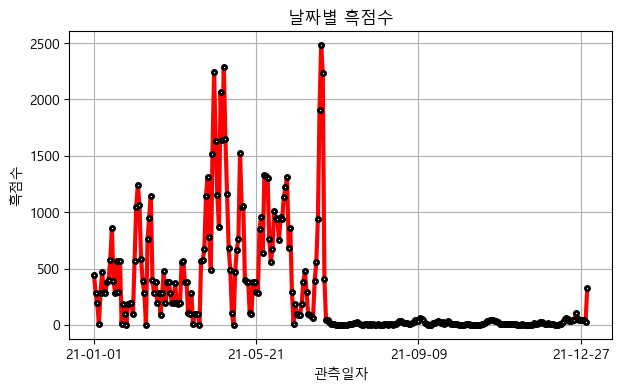

In [11]:
plt.figure()
plt.rcParams["figure.figsize"] = (20, 15)
plt.title('날짜별 흑점수')
plt.plot(cdf.index, cdf['흑점수'], color="#fc0303", linestyle='-', linewidth=3,
         marker="o", markersize = 3, markerfacecolor = "#ffffff",
         markeredgecolor = "#000000", markeredgewidth=2)

plt.xlabel('관측일자')
plt.ylabel('흑점수')
plt.grid()

total_len = len(cdf.index)

plt.xticks(np.arange(0, total_len + 1, 100))
plt.show()
plt.close()

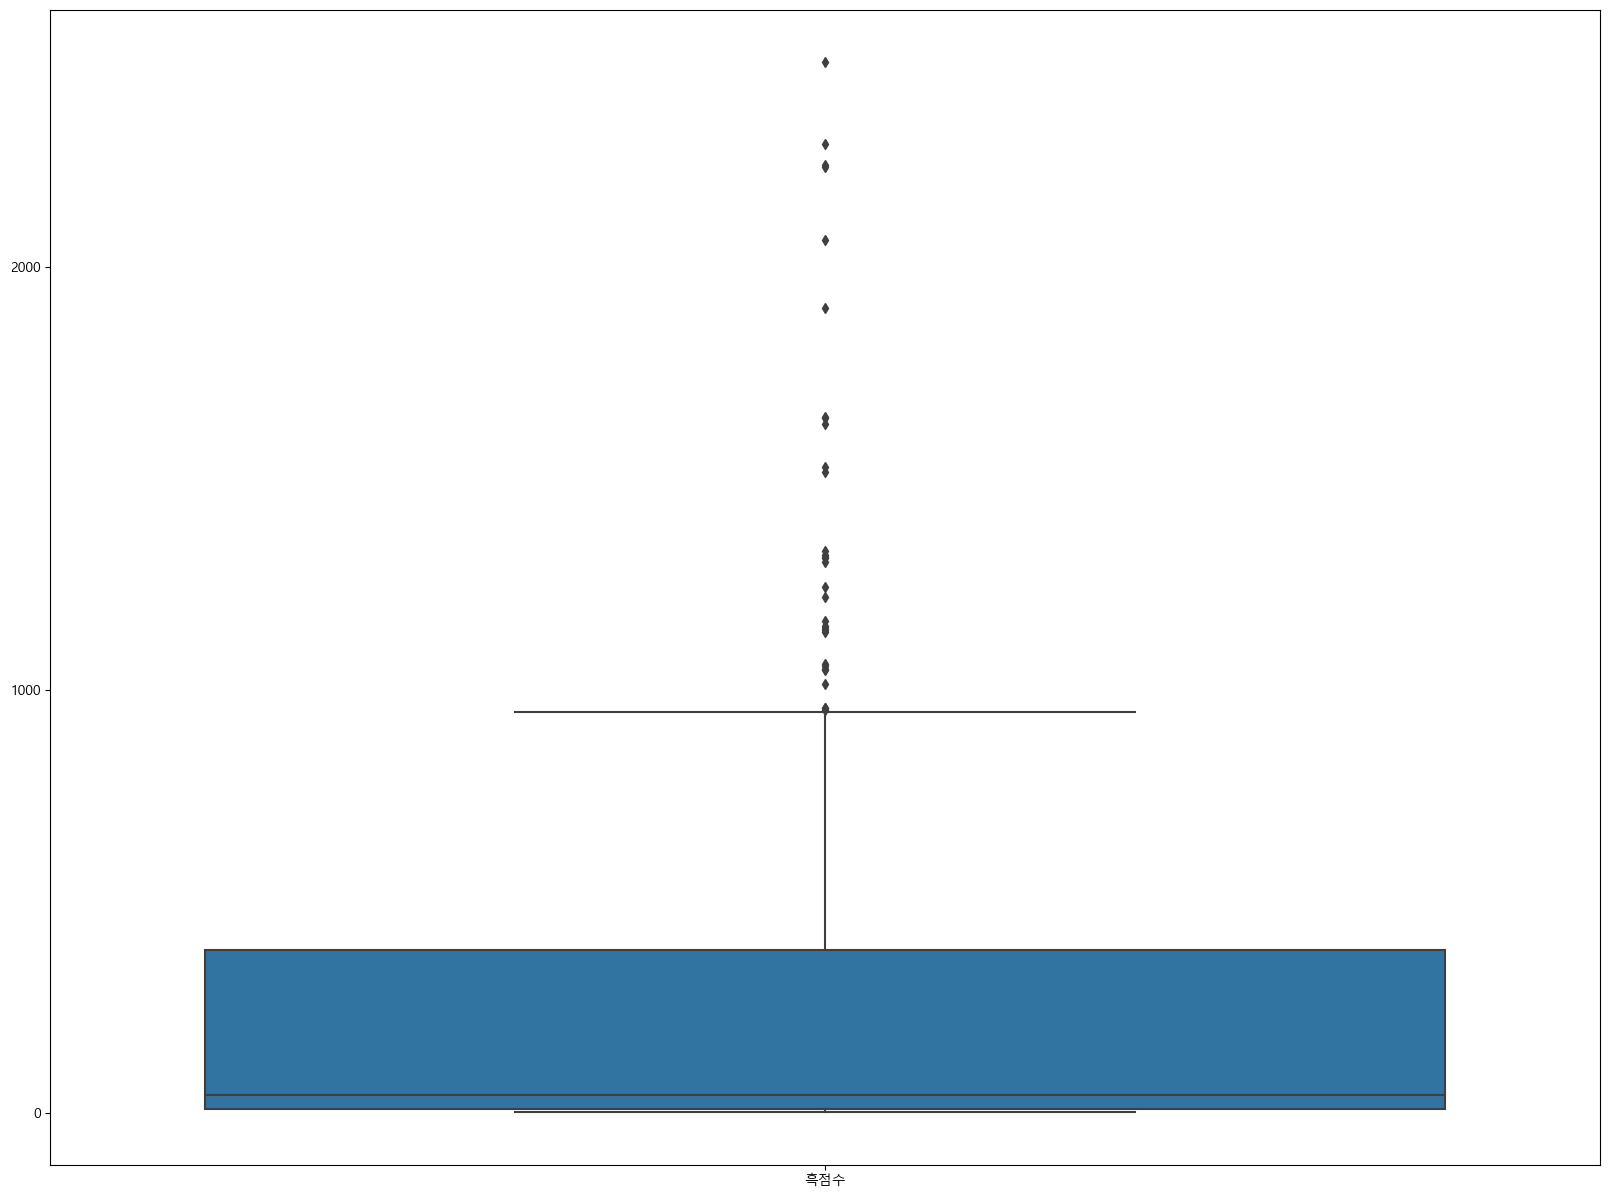

In [12]:
plt.figure()
sb.boxplot(data = cdf)
plt.yticks(np.arange(0,2800,1000))
plt.show()
plt.close()

In [13]:
hist, bins = np.histogram(cdf['흑점수'], bins = 10)
print(hist)
print(bins)

[201  43  17  16  11   6   5   1   1   4]
[1.0000e+00 2.4930e+02 4.9760e+02 7.4590e+02 9.9420e+02 1.2425e+03
 1.4908e+03 1.7391e+03 1.9874e+03 2.2357e+03 2.4840e+03]


In [14]:
info = []
for i, v in enumerate(hist):
    if i + 1 < len(hist):
        tpl = '%d이상 %d미만'
    else:
        tpl = '%d이상 %d이하'
    
    cls = tpl % (bins[i], bins[i + 1])
    line ={'계급' : cls, '도수' :  v}
    info.append(line)

hist_df = DataFrame(info)
hist_df.set_index('계급', inplace = True)
hist_df

,도수
계급,
1이상 249미만,201
249이상 497미만,43
497이상 745미만,17
745이상 994미만,16
994이상 1242미만,11
1242이상 1490미만,6
1490이상 1739미만,5
1739이상 1987미만,1
1987이상 2235미만,1


In [15]:
totaldatan = len(cdf)
hist_df['상대도수'] = hist_df['도수'] /  totaldatan
hist_df

,도수,상대도수
계급,,
1이상 249미만,201,0.659016
249이상 497미만,43,0.140984
497이상 745미만,17,0.055738
745이상 994미만,16,0.052459
994이상 1242미만,11,0.036066
1242이상 1490미만,6,0.019672
1490이상 1739미만,5,0.016393
1739이상 1987미만,1,0.003279
1987이상 2235미만,1,0.003279


C:\Users\User\AppData\Local\Temp\ipykernel_6688\3927224646.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.histplot(data = cdf, x = '흑점수', bins = 5, kde = True, palette='cool')


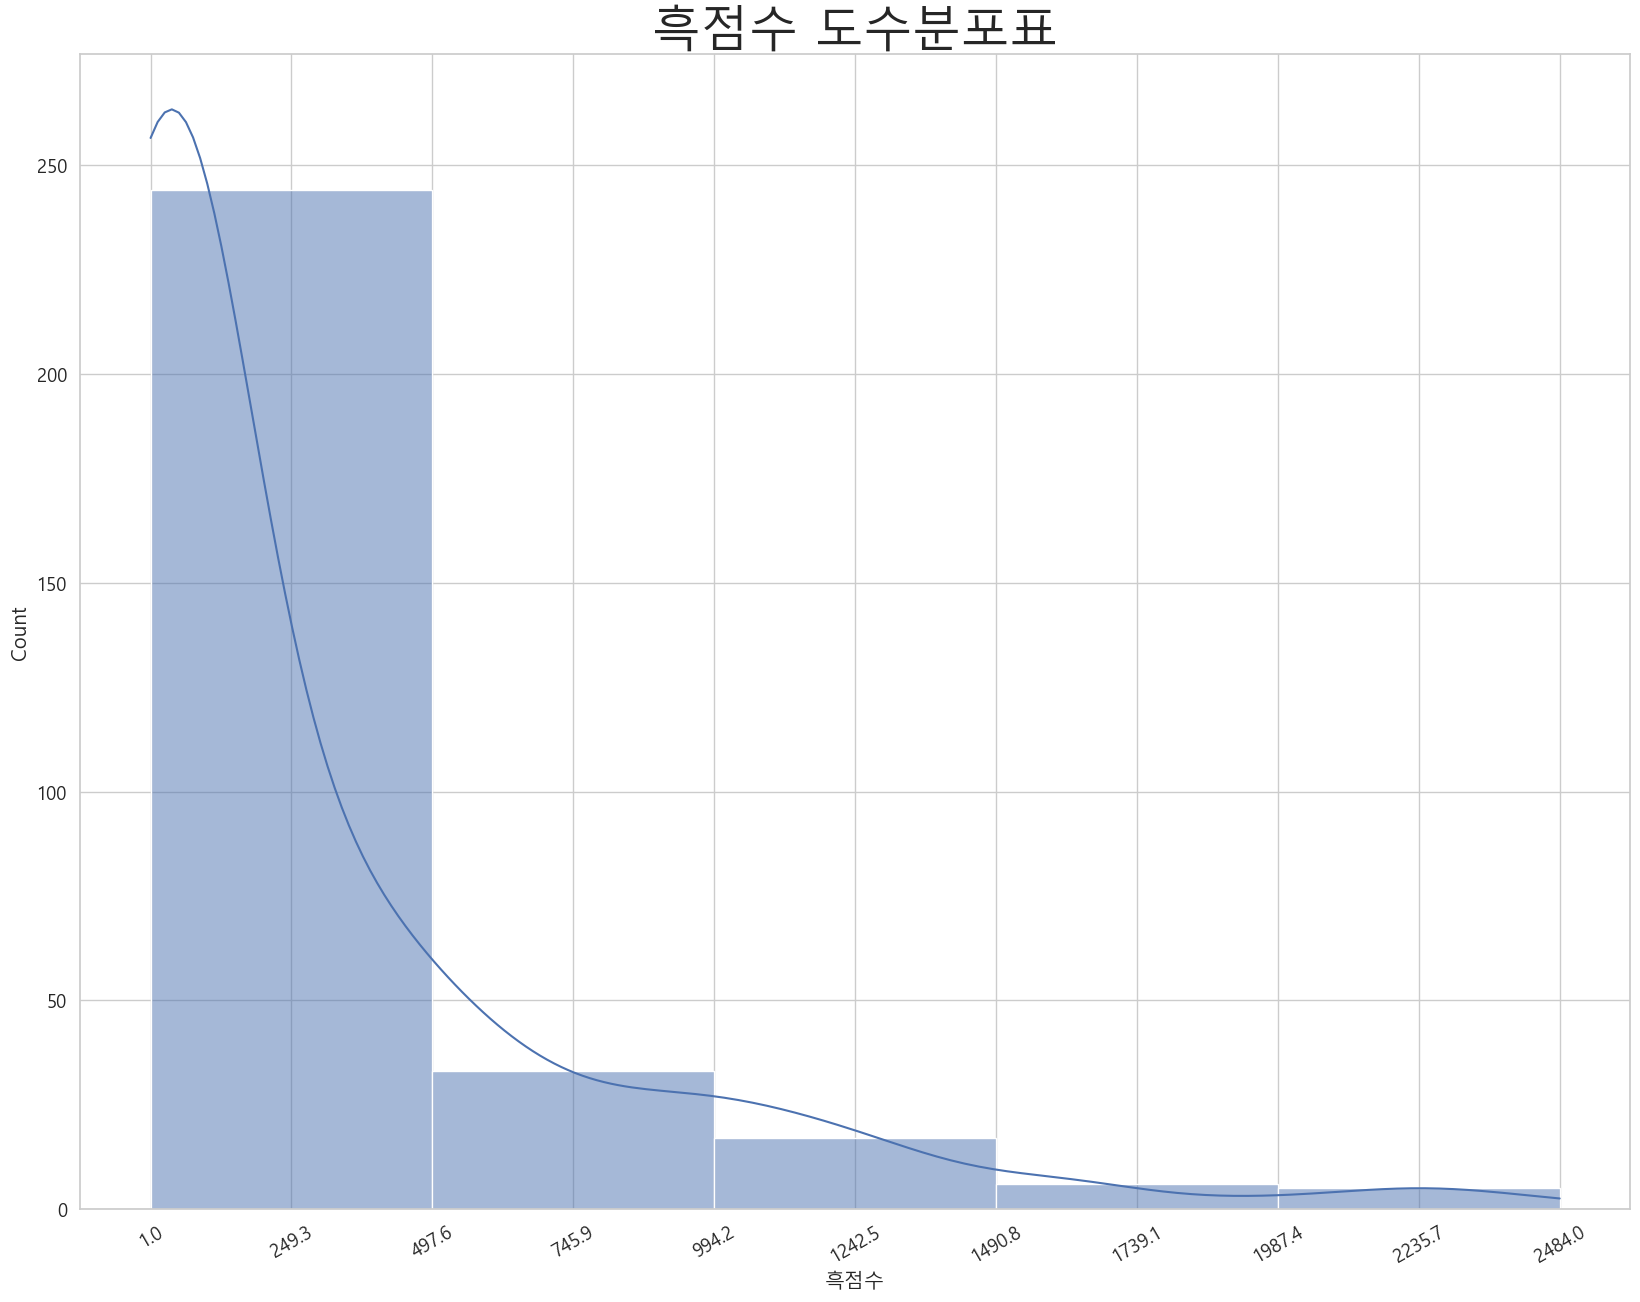

In [16]:
plt.figure()
hist, bins = np.histogram(cdf['흑점수'], bins = 10)

bins2 = np.round(bins, 1)

sb.set_theme(style = 'whitegrid', font = 'Malgun Gothic', font_scale =1.2)
sb.histplot(data = cdf, x = '흑점수', bins = 5, kde = True, palette='cool')

plt.title('흑점수 도수분포표', fontsize = 35)
plt.xticks(bins2, bins2, rotation =  30)
plt.show()
plt.close()

# 태양광 에너지 발전량 데이터 가져오기

  - 데이터 출처

    * https://www.data.go.kr/data/15065269/fileData.do#layer_data_infomation

In [18]:
sf = pd.read_csv("C:\\Users\\User\\MDblue\\Bigdata\\수업내용\\세미프로젝트/태양광.csv", encoding = 'cp949')
sf.drop(['거래시간'], axis = 1, inplace = True)
sf

,거래일자,지역,발전량
0,2018-01-01,강원도,13.680
1,2018-01-01,강원도,0.000
2,2018-01-01,강원도,14.400
3,2018-01-01,강원도,0.000
4,2018-01-01,강원도,0.000
...,...,...,...
596083,2021-12-31,충청북도,47668.337
596084,2021-12-31,충청북도,41720.571
596085,2021-12-31,충청북도,23464.794
596086,2021-12-31,충청북도,8098.187


# 2021년도 데이터 산출하기

In [19]:
# 시작일과 종료일 설정

start_date = '2021-01-01'
end_date = '2021-12-31'
# 검색 기간에 따른 데이터 추출
ssf = sf.query("`거래일자` >= @ start_date and `거래일자` <= @end_date")
ssf


,거래일자,지역,발전량
447168,2021-01-01,강원도,1076.659
447169,2021-01-01,강원도,257.927
447170,2021-01-01,강원도,0.720
447171,2021-01-01,강원도,0.000
447172,2021-01-01,강원도,0.000
...,...,...,...
596083,2021-12-31,충청북도,47668.337
596084,2021-12-31,충청북도,41720.571
596085,2021-12-31,충청북도,23464.794
596086,2021-12-31,충청북도,8098.187


# 날짜와 지역별 태양광 에너지 데이터 전처리

In [20]:
sdf = ssf.groupby(['거래일자','지역']).sum()
sdf

발전량 
거래일자       지역               
2021-01-01 강원도   1141609.653
           경기도    573033.694
           경상남도   768190.354
           경상북도   981012.455
           광주시     21928.302
...                      ...
2021-12-31 전라남도  3708362.468
           전라북도  1208194.009
           제주도    621527.670
           충청남도  1740624.960
           충청북도   836706.701

[6205 rows x 1 columns]

# 날짜별 태양광 에너지 발전량 전처리

#### 태양열 에너지의 발전량 단위는 KWh 이므로 MWh 로 변환

In [21]:
dsdf = sdf.groupby(['거래일자']).sum()
dsdf = dsdf.reset_index(drop = False, inplace = False)
dsdf.columns = ['관측일자','태양광전력생산량(MWh)']
dsdf['태양광전력생산량(MWh)'] = np.multiply(dsdf['태양광전력생산량(MWh)'], 0.001).round(0)
# dsdf.to_excel('신태양샌산.xlsx')
dsdf

,관측일자,태양광전력생산량(MWh)
0,2021-01-01,7724.0
1,2021-01-02,13213.0
2,2021-01-03,11323.0
3,2021-01-04,11817.0
4,2021-01-05,9585.0
...,...,...
360,2021-12-27,12155.0
361,2021-12-28,8646.0
362,2021-12-29,9481.0
363,2021-12-30,14851.0


In [41]:
dsdf.copy()
dsdf['관측일자'] = dsdf['관측일자'].astype('str')
dsdf['관측일자'] = pd.to_datetime(dsdf['관측일자'])
dsdf['관측일자'] = dsdf['관측일자'].apply(lambda x : dt.datetime.strftime(x, '%y-%m-%d'))
dsdf2 = dsdf.set_index('관측일자').astype({'태양광전력생산량(MWh)' : int})
# dsdf2.to_excel('태양생산전.xlsx')
dsdf2


C:\Users\User\AppData\Local\Temp\ipykernel_6688\3725197475.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dsdf['관측일자'] = pd.to_datetime(dsdf['관측일자'])


,태양광전력생산량(MWh)
관측일자,
21-01-01,7724
21-01-02,13213
21-01-03,11323
21-01-04,11817
21-01-05,9585
...,...
21-12-27,12155
21-12-28,8646
21-12-29,9481


# 지역별 태양광 에너지 발전량 전처리

#### 태양열 에너지의 발전량 단위는 KWh 이므로 MWh 로 변환

In [23]:
sdf2 = sdf.groupby(['지역']).sum()
sdf2 = sdf2.sort_values('지역')
sdf3 = sdf2.reset_index(drop = False, inplace = False)
sdf3.columns = ['지역','태양광전력생산량(MWh)']
sdf3['태양광전력생산량(MWh)'] = np.multiply(sdf3['태양광전력생산량(MWh)'], 0.001)
gsdf = sdf3.astype({'태양광전력생산량(MWh)' : int})
gsdf

,지역,태양광전력생산량(MWh)
0,강원도,561745
1,경기도,306276
2,경상남도,388484
3,경상북도,672385
4,광주시,69681
5,대구시,55582
6,대전시,14599
7,부산시,92964
8,서울시,16981
9,세종시,26117


#### 지역별 태양에너지 생산금액 데이터 추가
- 2021년 기준 태양광의 생산단가는 1kWh 당 93.4원 = 1MWh 당 93,400

In [ ]:
# sdf4['태양광생산금액(원)'] = np.multiply(sdf4['태양광전력생산량(MWh)'], 93400)
# scdf = sdf4
# scdf

# 생산 금액을 계산하는 과정에서 계산 오류 발견 시간상 이 데이터는 추후에 고쳐서 사용한다.

# 에너지 소비 전력 데이터 가져오기

  - 데이터 출처:

    * https://kosis.kr/search/search.do#none

In [24]:
ef = read_excel("C:\\Users\\User\\MDblue\\Bigdata\\수업내용\\세미프로젝트/지역별에너지원소비실적.xlsx")
ef

d:\python\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,지역별(1),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6
0,지역별(1),업체수 (개),합계 (toe),연료 (toe),연료 (toe),연료 (toe),연료 (toe),전력 (MWh)
1,지역별(1),소계,소계,소계,석탄류,석유류,가스류,소계
2,계,3047,104233378,86534226,35775266,4847431,45911530,205804088
3,서울,33,377290,266437,-,2005,264432,1288990
4,부산,100,738556,404058,43657,4677,355724,3889507
5,대구,112,1056328,850018,178296,81897,589825,2398953
6,인천,123,4653756,3982716,28652,22919,3931145,7802790
7,광주,48,336299,200269,-,7635,192634,1581737
8,대전,48,396631,227112,-,8701,218412,1971151
9,울산,184,11609861,9124018,570614,1233380,7320024,28905151


# 지역별 에너지 소비량 데이터 전처리

In [25]:
eef = ef.rename(columns = ef.iloc[0])
eef.drop([0,1,2], axis = 0, inplace = True)
eef2 = eef.rename(columns={'지역별(1)' : '지역','전력 (MWh)' : '소비전력(MWh)'})
eef2

,지역,업체수 (개),합계 (toe),연료 (toe),연료 (toe),연료 (toe),연료 (toe),소비전력(MWh)
3,서울,33,377290,266437,-,2005,264432,1288990
4,부산,100,738556,404058,43657,4677,355724,3889507
5,대구,112,1056328,850018,178296,81897,589825,2398953
6,인천,123,4653756,3982716,28652,22919,3931145,7802790
7,광주,48,336299,200269,-,7635,192634,1581737
8,대전,48,396631,227112,-,8701,218412,1971151
9,울산,184,11609861,9124018,570614,1233380,7320024,28905151
10,세종,30,175291,57648,-,7486,50162,1367931
11,경기,680,18215915,14182089,475843,236961,13469285,46904949
12,강원,61,4390806,3977894,3055180,371072,551642,4801296


In [26]:
eef2.columns = ['지역','지','금' ,'사','용','안','함','소비전력(MWh)']
gef1= eef2.filter(['지역','소비전력(MWh)'])
gef = gef1.sort_values('지역')
gef['지역'] = gef['지역'].map({'강원':'강원도', '경기':'경기도', '경남':'경상남도', '경북':'경상북도', '광주':'광주시', '대구':'대구시', '대전':'대전시', '부산':'부산시', '서울':'서울시', '울산':'울산시', '인천':'인천시', '전남':'전라남도', '전북':'전라북도', '충남':'충청남도', '충북':'충청북도', '제주' : '제주도','세종' : '세종시'})
gef['소비전력(MWh)'] = gef['소비전력(MWh)'].astype(int)
gef

,지역,소비전력(MWh)
12,강원도,4801296
11,경기도,46904949
18,경상남도,11068593
17,경상북도,21007135
7,광주시,1581737
5,대구시,2398953
8,대전시,1971151
4,부산시,3889507
3,서울시,1288990
10,세종시,1367931


#### 전체 에너지 소비량 대한 가중치 부여

  - 2021년 총에너지 생산량 중 신재생에너지 비중은 7.5% 이다.
  - 2021년 신재생에너지 중 태양광에너지의 비중은 18% 이다.
  - 2021년 기준 태양광의 생산단가는 1kWh 당 93.4원 = 1MWh 당 93,400

  -참고 자료 : 
    
    * http://blog.energy.or.kr/?p=27025
   
    * https://www.newstof.com/news/articleView.html?idxno=20204

#### 비중에 따른 신재생에너지소비전력과 태양에너지소비전력 데이터

In [27]:
gef['신재생에너지소비전력(MWh)'] = np.multiply(gef['소비전력(MWh)'], 0.18).round(0)
gef['태양에너지소비전력(MWh)'] = np.multiply(gef['신재생에너지소비전력(MWh)'],0.075).round(0)
gef.round(0)
gef

,지역,소비전력(MWh),신재생에너지소비전력(MWh),태양에너지소비전력(MWh)
12,강원도,4801296,864233.0,64817.0
11,경기도,46904949,8442891.0,633217.0
18,경상남도,11068593,1992347.0,149426.0
17,경상북도,21007135,3781284.0,283596.0
7,광주시,1581737,284713.0,21353.0
5,대구시,2398953,431812.0,32386.0
8,대전시,1971151,354807.0,26611.0
4,부산시,3889507,700111.0,52508.0
3,서울시,1288990,232018.0,17401.0
10,세종시,1367931,246228.0,18467.0


#### 지역별 태양에너지소비전력 데이터

In [28]:
gsef= gef.filter(['지역','태양에너지소비전력(MWh)'])
gsef2 = gsef.astype({'태양에너지소비전력(MWh)' : int})
gsef2

,지역,태양에너지소비전력(MWh)
12,강원도,64817
11,경기도,633217
18,경상남도,149426
17,경상북도,283596
7,광주시,21353
5,대구시,32386
8,대전시,26611
4,부산시,52508
3,서울시,17401
10,세종시,18467


#### 지역별 태양에너지 소비금액 데이터 추가
- 2021년 기준 태양광의 생산단가는 1kWh 당 93.4원 = 1MWh 당 93,400

In [ ]:
# gsef2['태양에너지소비금액(원)'] = np.multiply(gsef2['태양에너지소비전력(MWh)'], 93400)
# gcdf = gsef2
# gcdf

# 날짜별 태양 흑점 수와 태양에너지 생산량 데이터 가져오기

In [29]:
sunplot = read_excel("C:\\Users\\User\\MDblue\\Bigdata\\수업내용\\세미프로젝트/에너지흑점수.xlsx")
sunplot

,관측일자,태양광전력생산량(MWh),흑점수
0,21-01-01,7724,443.0
1,21-01-02,13213,282.0
2,21-01-03,11323,191.0
3,21-01-04,11817,6.0
4,21-01-05,9585,NaN
...,...,...,...
360,21-12-27,12155,45.0
361,21-12-28,8646,45.0
362,21-12-29,9481,47.0
363,21-12-30,14851,29.0


# 결측치 확인하기

In [30]:
empty = sunplot.isnull()
empty.sum()

관측일자              0
태양광전력생산량(MWh)     0
흑점수              60
dtype: int64

# 결측차 값 0으로 대체하기

In [31]:
re_sunplot = sunplot.fillna(value = 0)
re_sunplot

,관측일자,태양광전력생산량(MWh),흑점수
0,21-01-01,7724,443.0
1,21-01-02,13213,282.0
2,21-01-03,11323,191.0
3,21-01-04,11817,6.0
4,21-01-05,9585,0.0
...,...,...,...
360,21-12-27,12155,45.0
361,21-12-28,8646,45.0
362,21-12-29,9481,47.0
363,21-12-30,14851,29.0


# 최종 데이터 정리

# 1. 날짜별 태양에너지와 흑점수

In [32]:
resunplot = read_excel("C:\\Users\\User\\MDblue\\Bigdata\\수업내용\\세미프로젝트/월별에너지흑점수.xlsx")
resunplot

,관측일자,태양광전력생산량(MWh),흑점수
0,1월,11008,366
1,2월,16080,450
2,3월,18821,339
3,4월,22091,1032
4,5월,20465,638
5,6월,21110,649
6,7월,20341,105
7,8월,17125,10
8,9월,16615,23
9,10월,18111,13


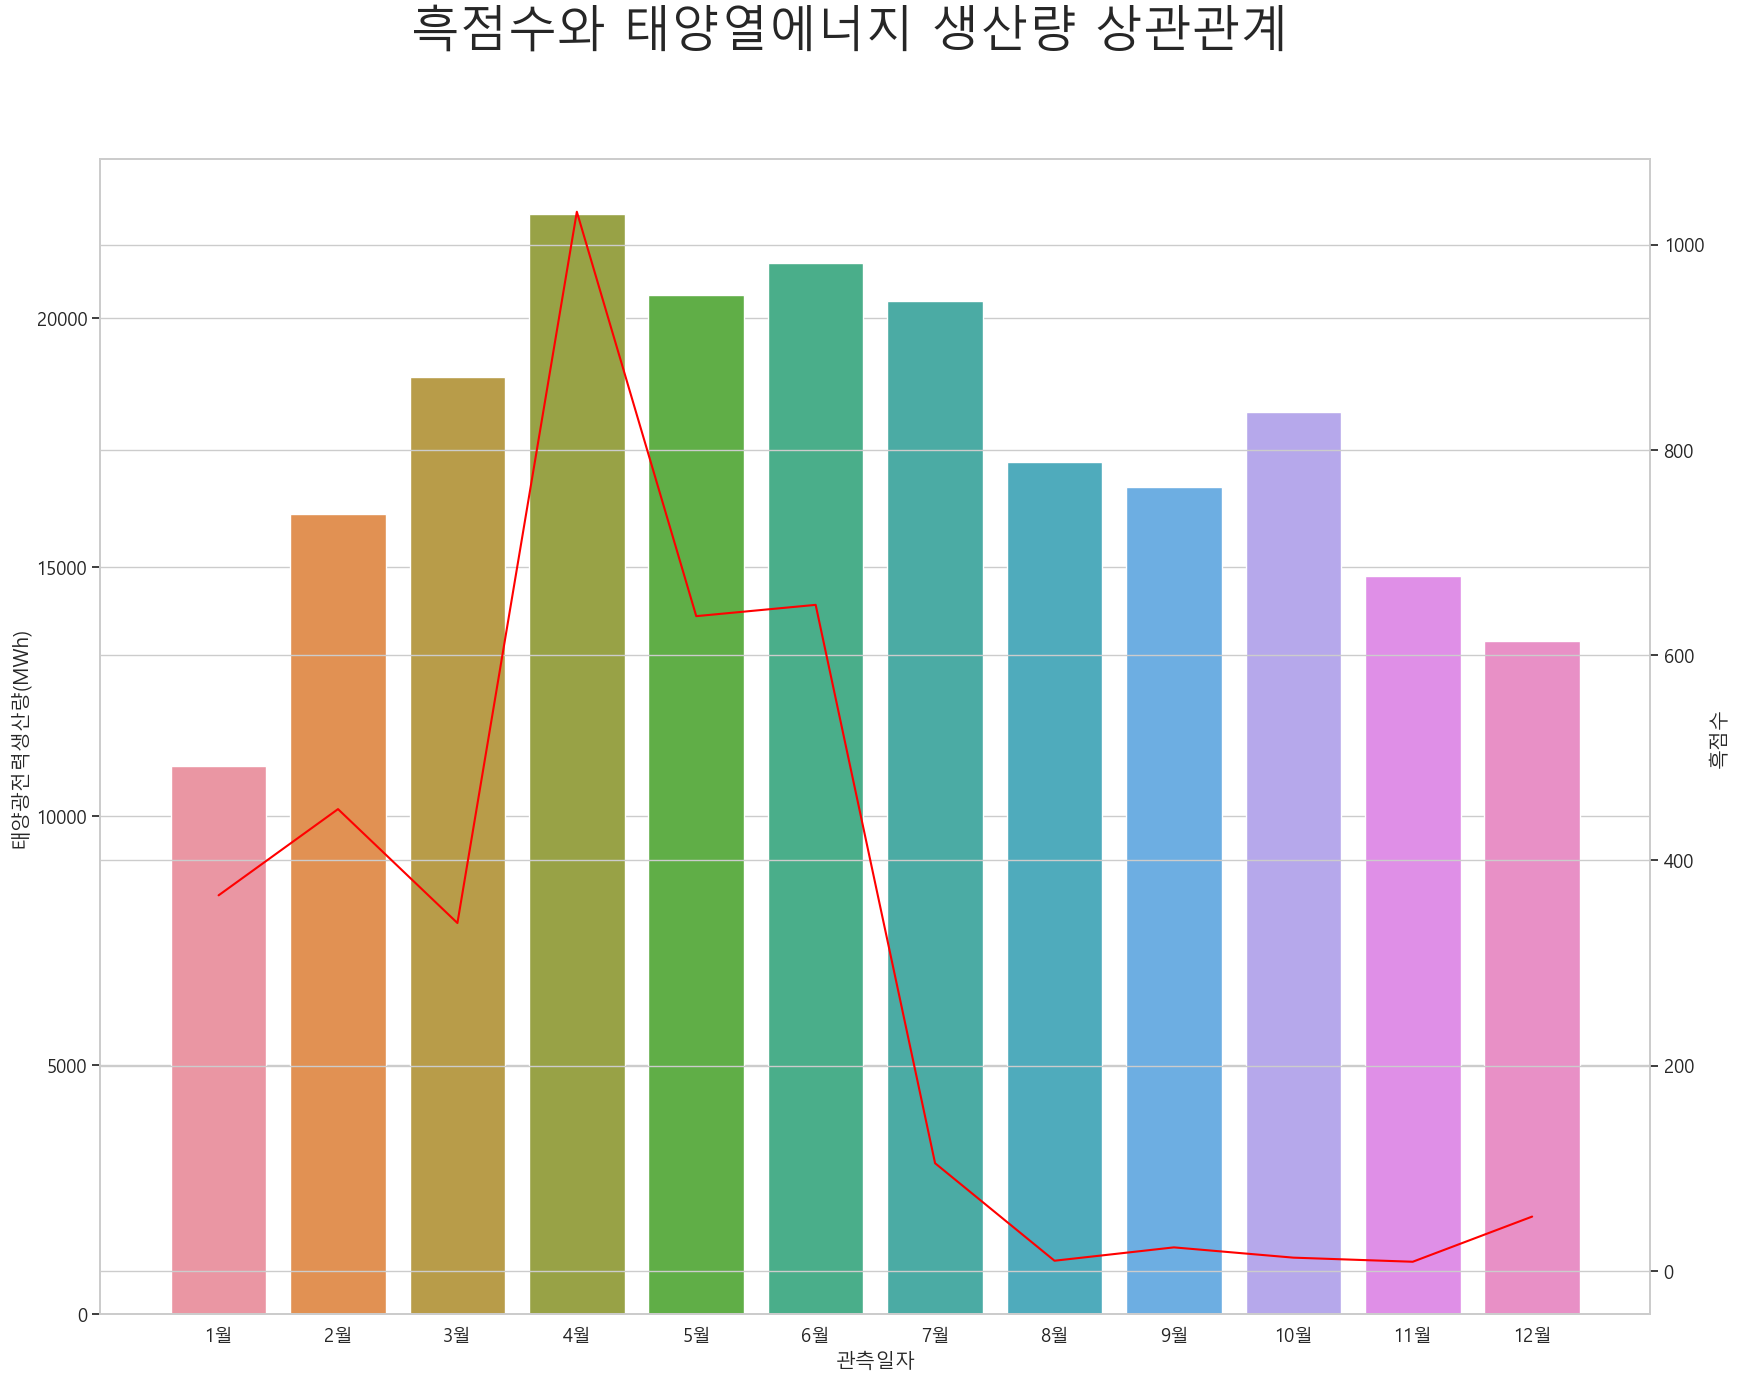

In [33]:
fig , ax1 = plt.subplots(1,1)

ax2 = ax1.twinx()

fig.suptitle("흑점수와 태양열에너지 생산량 상관관계", fontsize = 35)

sb.barplot(data = resunplot, x= '관측일자', y= '태양광전력생산량(MWh)',ax = ax1)

sb.lineplot(data = resunplot, x= '관측일자', y= '흑점수', color = 'red',ax = ax2)

plt.show()
plt.close()

# 2. 지역별 태양에너지 생산량과 소비량

In [34]:
gsedf = merge(gsdf,gsef2)
gsedf

,지역,태양광전력생산량(MWh),태양에너지소비전력(MWh)
0,강원도,561745,64817
1,경기도,306276,633217
2,경상남도,388484,149426
3,경상북도,672385,283596
4,광주시,69681,21353
5,대구시,55582,32386
6,대전시,14599,26611
7,부산시,92964,52508
8,서울시,16981,17401
9,세종시,26117,18467


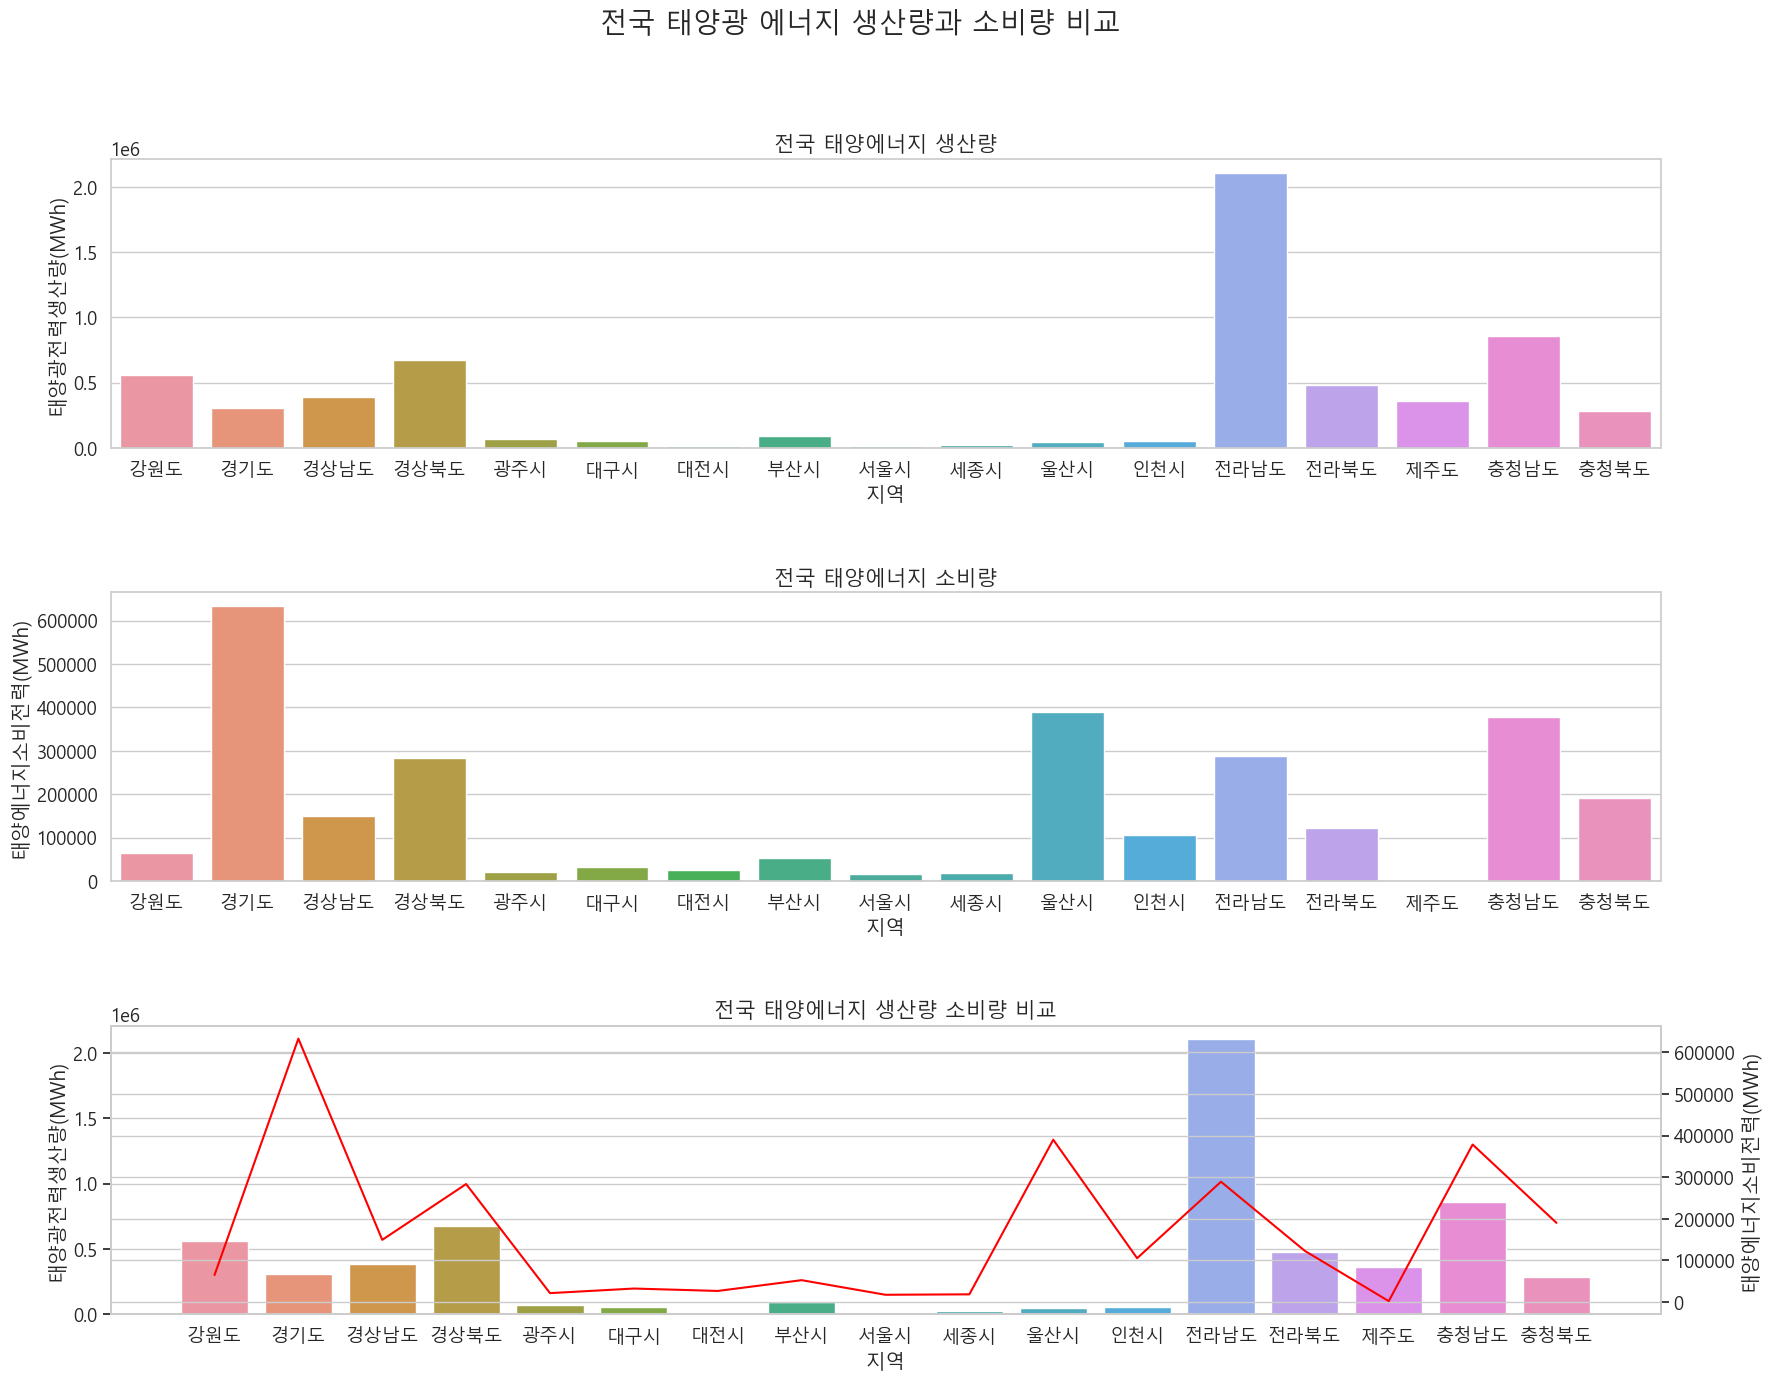

In [35]:
fig , (ax1, ax2, ax3_left) = plt.subplots(3,1)
plt.rcParams["figure.figsize"] = (20, 15)
ax3_right = ax3_left.twinx()

fig.suptitle("전국 태양광 에너지 생산량과 소비량 비교", fontsize = 20)

# 첫번째 그래프
sb.barplot(data = gsedf, x= '지역', y= '태양광전력생산량(MWh)',ax = ax1)
ax1.set_title('전국 태양에너지 생산량', fontsize = 15)

# 두번째 그래프
sb.barplot(data = gsedf, x= '지역', y= '태양에너지소비전력(MWh)',ax = ax2)
ax2.set_title('전국 태양에너지 소비량', fontsize = 15)

# 세번째 그래프 제목 설정
ax3_left.set_title('전국 태양에너지 생산량 소비량 비교', fontsize = 15)
# 세번째 왼쪽 그래프
sb.barplot(data = gsedf, x= '지역', y= '태양광전력생산량(MWh)',ax = ax3_left)
# 세번째 오른쪽 그래프
sb.lineplot(data = gsedf, x= '지역', y= '태양에너지소비전력(MWh)', color = 'red',ax = ax3_right)

# 그래프 간격 조절
plt.subplots_adjust(wspace = 0, hspace = 0.5)

plt.show()
plt.close()

# 3. 지역별 총소비에너지 신생에너지소비 태양에너지소비 비교

In [36]:
gef['신재생에너지소비전력(MWh)']= gef['신재생에너지소비전력(MWh)'].astype(int)
gef['태양에너지소비전력(MWh)']= gef['태양에너지소비전력(MWh)'].astype(int)
gef

,지역,소비전력(MWh),신재생에너지소비전력(MWh),태양에너지소비전력(MWh)
12,강원도,4801296,864233,64817
11,경기도,46904949,8442891,633217
18,경상남도,11068593,1992347,149426
17,경상북도,21007135,3781284,283596
7,광주시,1581737,284713,21353
5,대구시,2398953,431812,32386
8,대전시,1971151,354807,26611
4,부산시,3889507,700111,52508
3,서울시,1288990,232018,17401
10,세종시,1367931,246228,18467


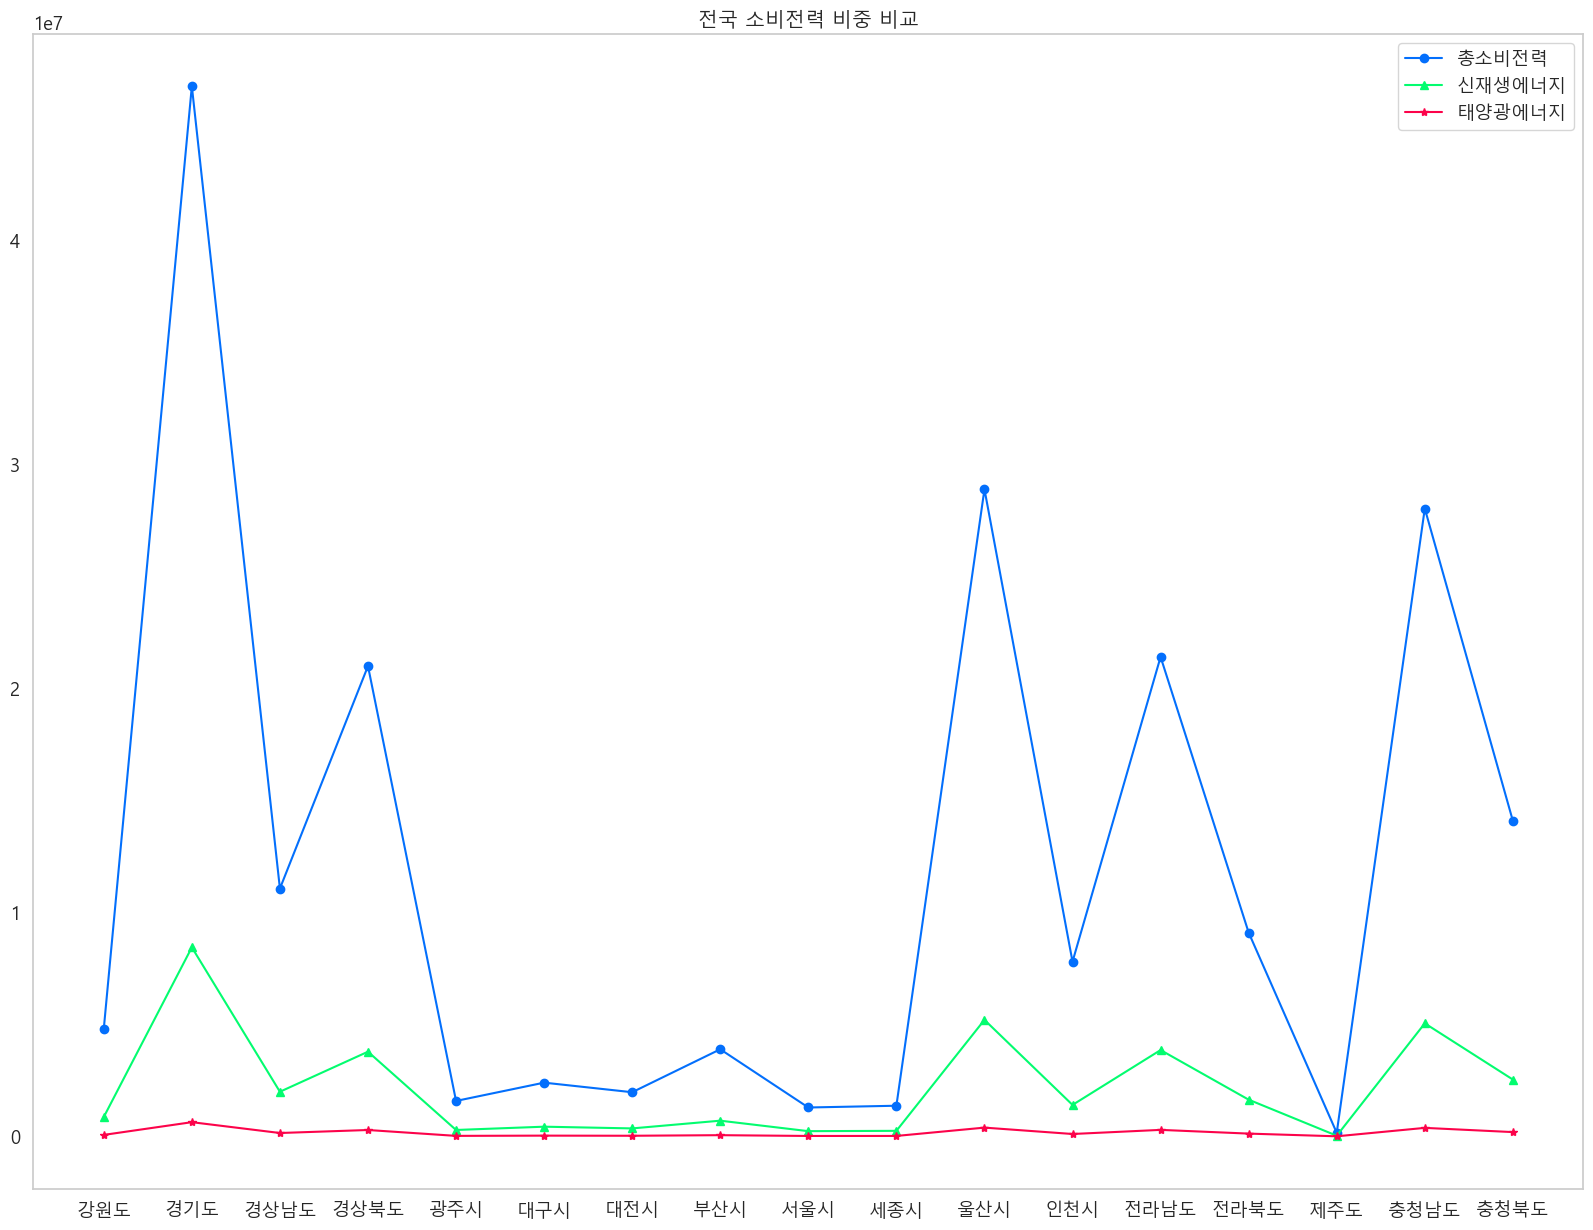

In [37]:
plt.figure()
plt.title("전국 소비전력 비중 비교")

plt.plot(gef['지역'], gef['소비전력(MWh)'], color='#036ffc', marker = 'o', label='총소비전력') 
plt.plot(gef['지역'], gef['신재생에너지소비전력(MWh)'], color='#03fc6f', marker = '^',label='신재생에너지')
plt.plot(gef['지역'], gef['태양에너지소비전력(MWh)'], color='#fc034a',  marker = '*' ,label='태양광에너지') 


plt.grid()
plt.legend()


plt.show()
plt.close()

In [44]:
# jupyter 상에서 SVG 이미지를 표시하기 위한 패키지(jupyter 기본 내장 패키지)
from IPython.display import SVG

# TAG로부터 원하는 내용을 추출하는 클래스 -> SVG 이미지의 핸들링을 위함
from bs4 import BeautifulSoup

# 원격지의 svg 파일의 내용을 읽어오기 위함.
import requests

from pandas import pivot_table, read_excel
import numpy as np
import os

In [117]:
gvdf = merge(gsdf,gsef2)
gvdf.drop(['태양에너지소비전력(MWh)'], axis = 1, inplace = True)

gvdf['지역'] = gvdf['지역'].map({'강원도':'강원도', '경기도':'경기도', '경상남도':'경상남도', '경상북도':'경상북도', '광주시':'광주광역시', '대구시':'대구광역시', '대전시':'대전광역시', '부산시':'부산광역시', '서울시':'서울특별시', '울산시':'울산광역시', '인천시':'인천광역시', '전라남도':'전라남도', '전라북도':'전라북도', '충청남도':'충청남도', '충청북도':'충청북도', '제주도' : '제주특별자치도','세종시' : '세종특별자치시'})

gvdf.set_index('지역', inplace = True)
gvdf

,태양광전력생산량(MWh)
지역,
강원도,561745
경기도,306276
경상남도,388484
경상북도,672385
광주광역시,69681
대구광역시,55582
대전광역시,14599
부산광역시,92964
서울특별시,16981


In [81]:
hist, bins = np.histogram(gvdf['태양광전력생산량(MWh)'], bins = 6)
print(hist)
print(bins)

[11  4  1  0  0  1]
[  14599.  363263.  711927. 1060591. 1409255. 1757919. 2106583.]


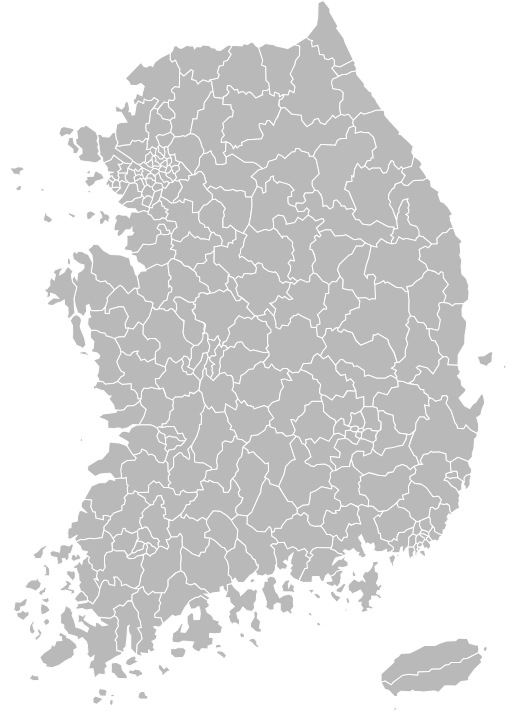

In [118]:
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36"
header_info = {'User-agent': user_agent, 'referer': None}

r = requests.get('https://data.hossam.kr/D04/map_korea.svg', headers=header_info)

# 결과 검사
if r.status_code != 200:
    # 에러코드와 에러메시지를 문자열로 구성
    err_msg = "%d %s 에러가 발생했습니다." % (r.status_code, r.reason)
    # 강제로 에러를 발생시킨다.
    raise Exception(err_msg)

map_svg = r.text
SVG(map_svg)

In [119]:
colors = ['#ebe834', '#6beb34', '#3493eb', '#7325fa', '#d625fa', '#ff1c4d']
colors

['#ebe834', '#6beb34', '#3493eb', '#7325fa', '#d625fa', '#ff1c4d']

In [120]:
soup = BeautifulSoup(map_svg)
sido = soup.select('g[id]')
sido

d:\python\Lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


[<g id="서울특별시">
 <path d="M171.5,167.272v2.167l1.167,1.25l-0.25,1.083l1.083,1.75l1.917,0.583
 		l0.333-1.5l3.833-2.833l-0.333-2.5l-0.833-1.667l-3.667-0.333L171.5,167.272" fill="#B9B9B9" id="강동구" stroke="#FFFFFF"></path>
 <path d="M171.5,169.439l-2.25,3.25l-3.333,0.417v2.5l2.833,2.25l1-0.083l0.667,1
 		l1.167,0.917l1.25,2.5l3.75-4.583l-1.167-3v-0.5l-1.917-0.583l-0.917-1.917l0.083-0.917L171.5,169.439z" fill="#B9B9B9" id="송파구" stroke="#FFFFFF"></path>
 <path d="M168.583,165.605l-1.5,0.25l-0.583,1.75l-1.25,3l-0.583,1.917l1.25,0.583
 		l3.333-0.417l2.25-3.25l-0.083-1.917l-1.833-3.083L168.583,165.605z" fill="#B9B9B9" id="광진구" stroke="#FFFFFF"></path>
 <path d="M166.667,158.939l0.417,6.917l1.5-0.25l3-2.917l-0.167-3.917L171,157.855
 		l-2.583,0.083L166.667,158.939z" fill="#B9B9B9" id="중랑구" stroke="#FFFFFF"></path>
 <path d="M164.917,146.605l-0.833,2.833l0.667,2.417l-0.5,3.75l-1.083,0.417
 		l1.75,2.083l1.917,1l1.583-1.167l3,0.333l-3-5.333l-0.5-6L164.917,146.605" fill="#B9B9B9" id="노원구" stroke=

In [123]:
stype = '태양광전력생산량(MWh)'

for item in sido:
    지역명 = item['id']

    # 지도상의 지역명이 데이터프레임에 없다면 무시한다.
    if 지역명 not in gvdf.index:
        continue

    # 지역명에 해당하는 데이터를 추출한다.
    count = gvdf.loc[지역명, stype]
    print(지역명, " --> ", count)

    # 학교 수에 따라 단계값 설정 (단계는 색상값의 수에 따름)
    if count > 2000000:   color_index = 5
    elif count > 1000000: color_index = 4
    elif count > 900000: color_index = 3
    elif count > 500000: color_index = 2
    elif count > 20000: color_index = 1
    else:             color_index = 0

    # 시,도 안에서 구,군을 추출하여 반복
    for p in item.select('path'):
        if "fill" in p.attrs:
            p['fill'] = colors[color_index]

# SVG 이미지를 파일로 저장
with open('result.svg', 'w', encoding="utf-8") as f:
    f.write(soup.prettify())


서울특별시  -->  16981
인천광역시  -->  52479
경기도  -->  306276
강원도  -->  561745
충청북도  -->  286067
대전광역시  -->  14599
충청남도  -->  857139
제주특별자치도  -->  358836
경상북도  -->  672385
대구광역시  -->  55582
울산광역시  -->  44469
경상남도  -->  388484
부산광역시  -->  92964
전라북도  -->  480059
광주광역시  -->  69681
전라남도  -->  2106583
세종특별자치시  -->  26117


In [124]:
for c in gvdf.columns:
    stype = c

    for item in sido:
        지역명 = item['id']

        # 지도상의 지역명이 데이터프레임에 없다면 무시한다.
        if 지역명 not in gvdf.index:
            continue

        # 지역명에 해당하는 데이터를 추출한다.
        count = gvdf.loc[지역명, stype]
        print(지역명, " --> ", count)

        # 학교 수에 따라 단계값 설정 (단계는 색상값의 수에 따름)
        if count > 2000000:   color_index = 5
        elif count > 1000000: color_index = 4
        elif count > 900000: color_index = 3
        elif count > 500000: color_index = 2
        elif count > 20000: color_index = 1
        else:             color_index = 0

        # 시,도 안에서 구,군을 추출하여 반복
        for p in item.select('path'):
            if "fill" in p.attrs:
                p['fill'] = colors[color_index]

    # SVG 이미지를 파일로 저장
    with open('%s.svg' % stype, 'w', encoding="utf-8") as f:
        f.write(soup.prettify())

서울특별시  -->  16981
인천광역시  -->  52479
경기도  -->  306276
강원도  -->  561745
충청북도  -->  286067
대전광역시  -->  14599
충청남도  -->  857139
제주특별자치도  -->  358836
경상북도  -->  672385
대구광역시  -->  55582
울산광역시  -->  44469
경상남도  -->  388484
부산광역시  -->  92964
전라북도  -->  480059
광주광역시  -->  69681
전라남도  -->  2106583
세종특별자치시  -->  26117


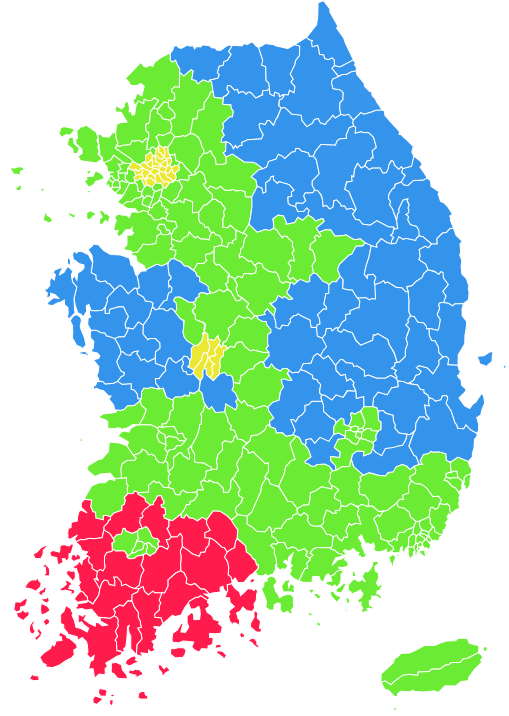

In [125]:
# bs4 객체의 내용을 문자열로 리턴
new_korea_svg = soup.prettify()

# jupyter에서 svg 이미지 표시하기
# 사용방법 -> SVG(소스문자열)  혹은   SVG(파일경로)
SVG(new_korea_svg)